### Imports
<hr style="border:2px solid magenta">  

Adding imports. Use environment.yml in folder for the environment I used for this file. I had some difficulties creating this environment so I'd save you the hassle.

In [1]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from tensorflow.keras import models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.metrics import Recall, Precision
import visualkeras
from PIL import ImageFont
import matplotlib.pyplot as plt  # Import the PIL library's ImageFont


### Final Model
<hr style="border:2px solid magenta">  

Creating a model of the final

In [2]:
model = models.Sequential()
model.add(Conv2D(
    64, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.8))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid',
                kernel_regularizer=regularizers.l2(0.001)))

model.compile(optimizer=optimizers.Adam(learning_rate=.001),
                    loss='binary_crossentropy',
                    metrics=['accuracy', Recall(), Precision()])

### Plotting a diagram

<hr style="border:2px solid magenta">  
Using plot_model from tensorflow.keras.utils

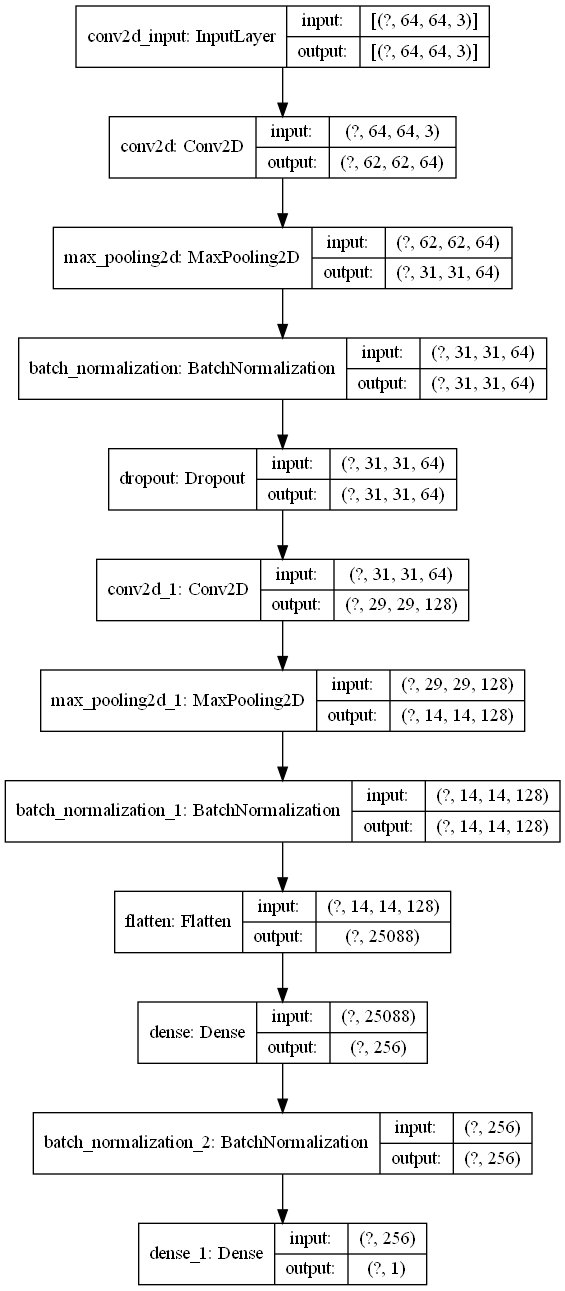

In [4]:
plot_model(model, to_file='Figures/model_architecture.png',
           show_shapes=True, show_layer_names=True)


### Visualkeras
<hr style="border:2px solid magenta"> 
This function uses pydot and graphviz libraries. Saves the diagram 

In [4]:
font = ImageFont.load_default()
visualkeras.layered_view(model, to_file='Figures/model.png',
                         legend=True, font=font).show()